<a href="https://colab.research.google.com/github/cmreyesvalencia-png/colab-git-assignment2-CR/blob/main/Lesson_9_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 9: Unsupervised Learning**
- **Course:** Data Analytics and Business Intelligence Analyst
- **Institution:** Willis College
- **Student Name:**  Carlos Reyes
- **Instructor:** Ratinder Rajpal
- **Date:** 2025 Nov, 08


#**Step1.Dataset Selection and Preprocessing:**

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [56]:
# Load the from my repository at GITHUB

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the Mall Customers dataset from GitHub
url = "https://raw.githubusercontent.com/cmreyesvalencia-png/colab-git-assignment2-CR/0cbf82bb1d22761a9f4031477bc3661e50d7ba24/Mall_Customers.csv"
data_df = pd.read_csv(url)

print (data_df.head())
print (data_df.info())



   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [57]:
# Create dataset class following sklearn structure
class MallCustomersData:
    def __init__(self):
        # Remove CustomerID as it's just an identifier
        features_df = data_df.drop('CustomerID', axis=1)

        # Store original data before preprocessing
        self.raw_data = features_df.copy()
        self.feature_names = features_df.columns.tolist()
        self.target = data_df['Spending Score (1-100)'].values

        # Apply preprocessing steps
        self._preprocess_data()

    def _preprocess_data(self):
        # Create a copy for preprocessing
        processed_df = self.raw_data.copy()

        # Step 1: One-hot encoding for categorical variable (Genre)
        processed_df = pd.get_dummies(processed_df, columns=['Genre'], prefix='Gender')

        # Step 2: Store processed feature names
        self.feature_names = processed_df.columns.tolist()

        # Step 3: Convert to numpy array
        self.data = processed_df.values

        # Step 4: Store scaler for potential use
        self.scaler = StandardScaler()
        self.scaled_data = self.scaler.fit_transform(self.data)

# Initialize the dataset object
data = MallCustomersData()

# Create feature matrix and target vector
X = pd.DataFrame(data.data, columns=data.feature_names)
X_scaled = pd.DataFrame(data.scaled_data, columns=data.feature_names)
y_true = data.target

# Display results
print("Original Features (with one-hot encoding):")
print(X.head())
print(f"\nFeature names: {data.feature_names}")
print(f"\nScaled Features (standardized):")
print(X_scaled.head())
print(f"\nTarget variable (Spending Score): {y_true[:10]}")

Original Features (with one-hot encoding):
  Age Annual Income (k$) Spending Score (1-100) Gender_Female Gender_Male
0  19                 15                     39         False        True
1  21                 15                     81         False        True
2  20                 16                      6          True       False
3  23                 16                     77          True       False
4  31                 17                     40          True       False

Feature names: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']

Scaled Features (standardized):
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0 -1.424569           -1.738999               -0.434801      -1.128152   
1 -1.281035           -1.738999                1.195704      -1.128152   
2 -1.352802           -1.700830               -1.715913       0.886405   
3 -1.137502           -1.700830                1.040418       0.886405   
4 -0.5

In [58]:
#impute the missing values

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#**Step2. Clustering:**

In [59]:
# Determine the optimal number of clusters using Elbow Method and Silhouette Score
inertia_list = []
silhouette_list = []

for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42, n_init=10)
  km.fit(X_scaled)
  inertia_list.append(km.inertia_)
  silhouette_list.append(silhouette_score(X_scaled, km.labels_))

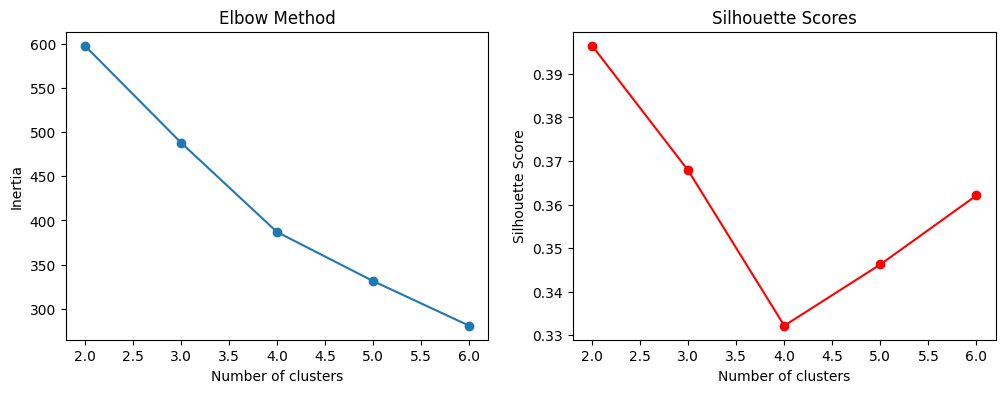

In [60]:
# plot the vizualisations:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(2,7), inertia_list, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.subplot(1,2,2)
plt.plot(range(2,7), silhouette_list, marker='o', color='red')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [61]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

#run KMeans 10 times, each time randomly initializing centroids.

#Best result wins : the clustering with the lowest sum of squared distances (inertia).
labels_kmeans = kmeans.fit_predict(X_scaled)

In [62]:
agg = AgglomerativeClustering(n_clusters=3)

# part of hierarcical clustering : agglomerative, decisive
labels_agg = agg.fit_predict(X_scaled)

# **Step3. Dimensionality Reduction**

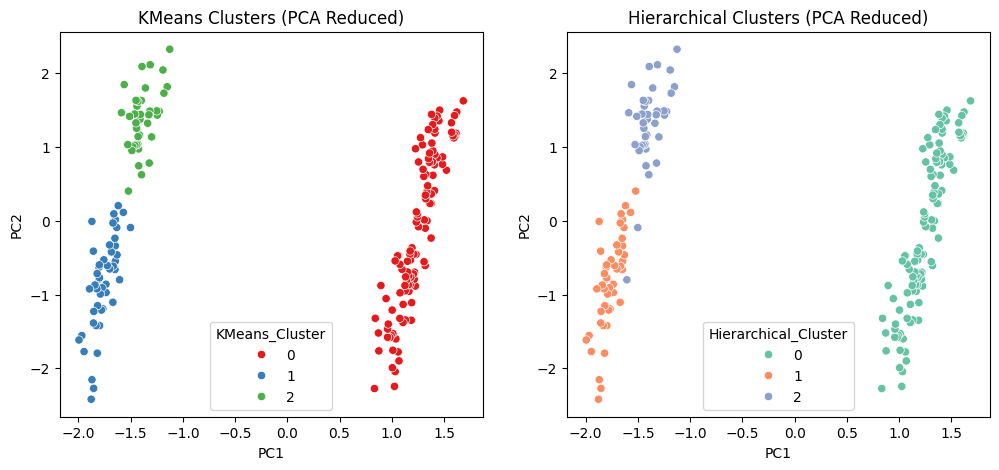

In [63]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['KMeans_Cluster'] = labels_kmeans
df_pca['Hierarchical_Cluster'] = labels_agg

#plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=df_pca, palette='Set1')
plt.title("KMeans Clusters (PCA Reduced)")
plt.subplot(1,2,2)
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=df_pca, palette='Set2')
plt.title("Hierarchical Clusters (PCA Reduced)")
plt.show()

# **Step4. Model Evaluation:**

In [48]:
sil_score_kmeans = silhouette_score(X_scaled, labels_kmeans)
sil_score_agg = silhouette_score(X_scaled, labels_agg)
print("KMeans Silhouette Score:", sil_score_kmeans)
print("Hierarchical Silhouette Score:", sil_score_agg)

KMeans Silhouette Score: 0.36782472313835896
Hierarchical Silhouette Score: 0.36282121580109944
